In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

# 3.4 3層のニューラルネットワークの実装

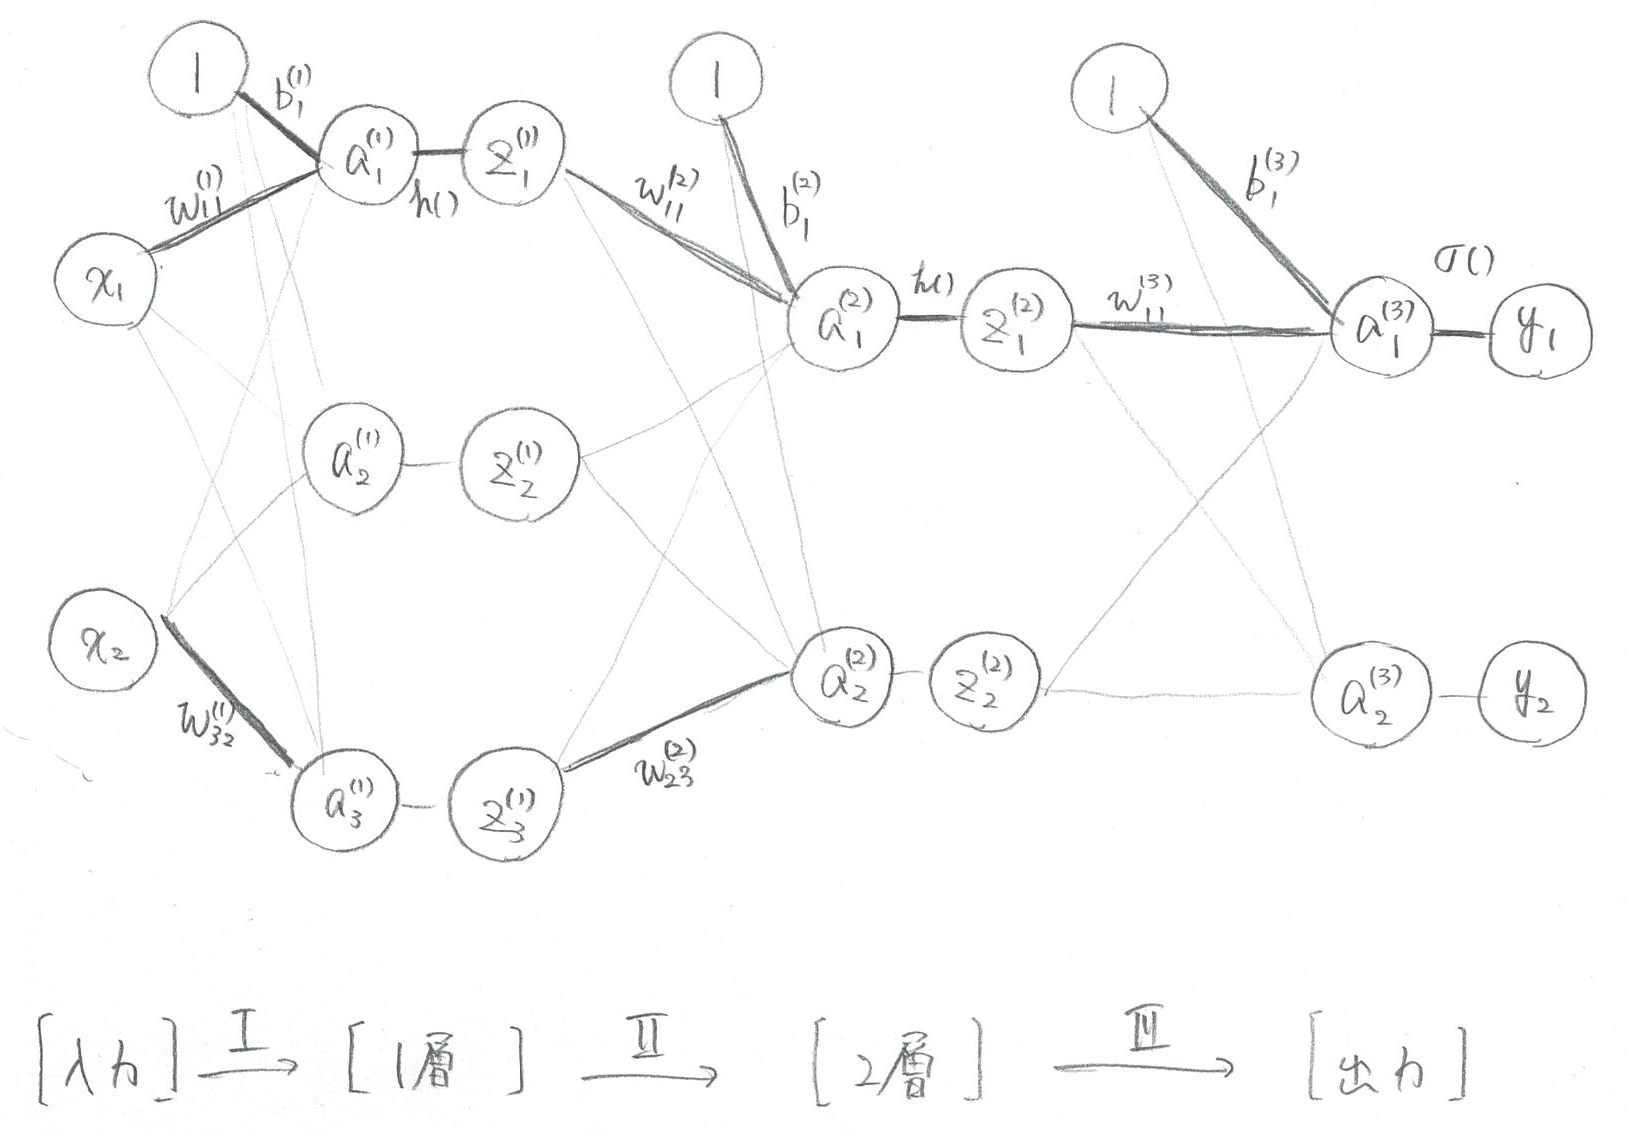

In [2]:
from IPython.display import Image
Image("全体像.png")

# 3.4.1 記号の確認

### $$x:入力値$$
### $$y:出力値$$
### $$a:ニューロン(ニューロンの手前)$$
### $$z:ニューロン(aに活性化関数を適用したもの)$$
### $$w:重み$$
### $$h():活性化関数$$
### $$b:バイアス$$

## $$w_{To \hspace{2mm} From}^{(層)}$$

# 3.4.2 各層における信号伝達の実装

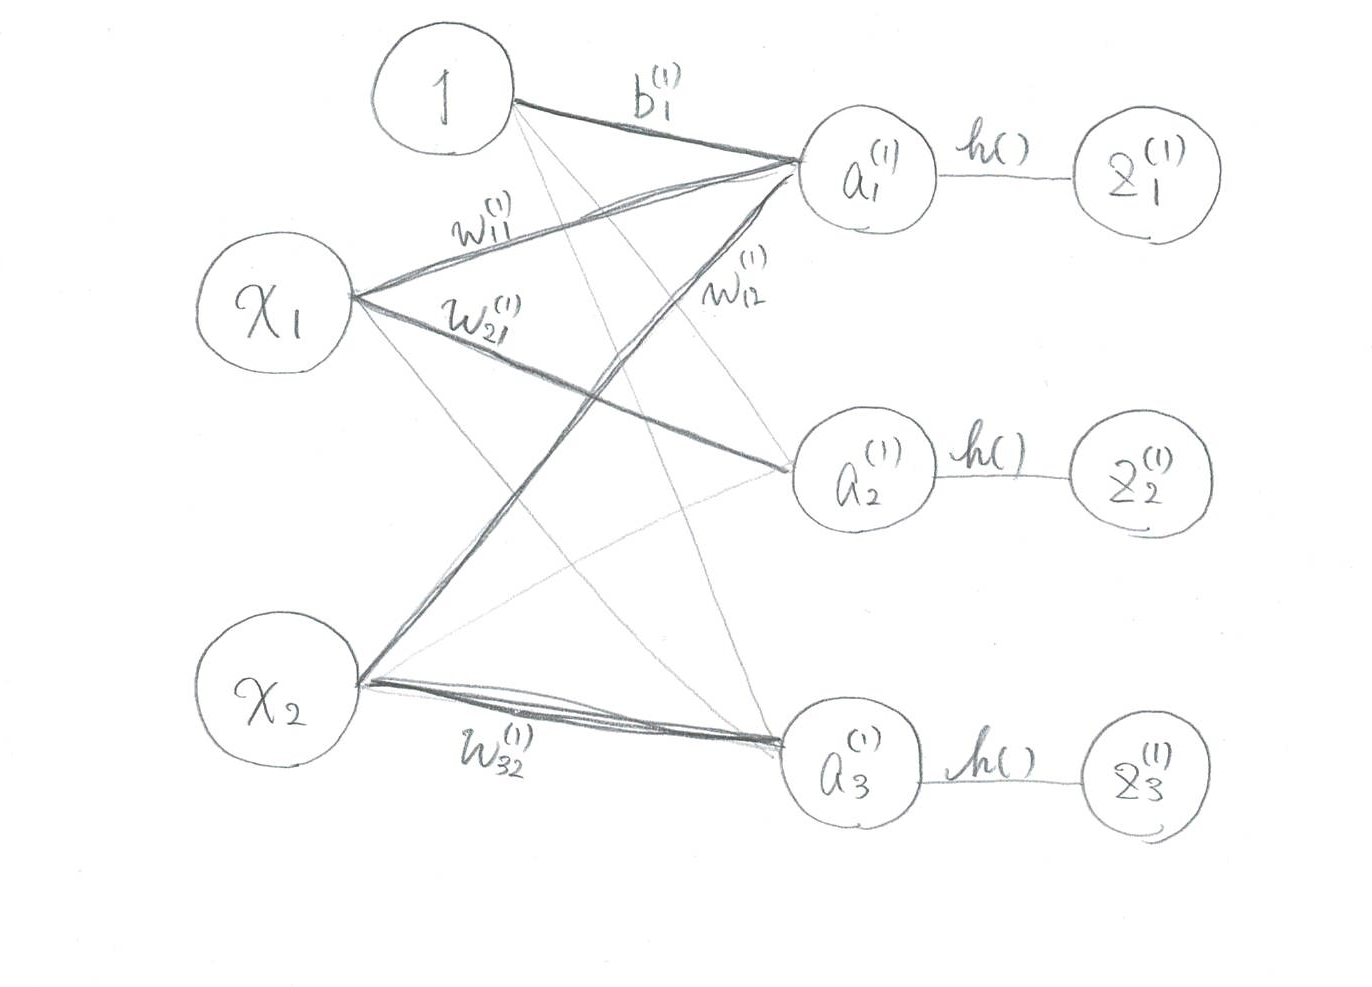

In [3]:
from IPython.display import Image
Image('１層目.png')

# 3.4.2.1 入力層から第一層への信号の伝達 - (I)

## $$ a_1^{(1)} =  w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}$$

## $$ a_2^{(1)} =  w_{21}^{(1)}x_1 + w_{22}^{(1)}x_2 + b_2^{(1)}$$

## $$ a_3^{(1)} =  w_{31}^{(1)}x_1 + w_{32}^{(1)}x_2 + b_3^{(1)}$$

$$ : $$

## $$ a_n^{(1)} =  w_{n1}^{(1)}x_1 + w_{n2}^{(1)}x_2 + b_n^{(1)} $$

## 行列の積を使うことで層ごとの各ニューロンの式をまとめて表記可能

### ⇨どんな形でも対応できる
### ⇨ニューロンの数や入力の数に制限がない

## $$A^{(1)} = XW^{(1)} + B^{(1)}$$

#### $$A^{(1)} = (a_1^{(1)} \hspace{2mm} a_2^{(1)} \hspace{2mm} a_3^{(1)}) $$
#### $$X = (x_1 \hspace{2mm} x_2) $$
#### $$B^{(1)} = (b_1^{(1)} \hspace{2mm} b_2^{(1)} \hspace{2mm} b_3^{(1)}) $$
#### $$W^{(1)} = \begin{pmatrix}w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} \\\end{pmatrix}$$


## コードの実装

In [4]:
import numpy as np
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape) # (1, 2)
print(W1.shape) # (2, 3)
print(B1.shape) # (1, 3)

# (1, 2) × (2, 3) = (1, 3)

A1 = np.dot(X, W1) + B1
print()
print('A1')
print(A1)

(2,)
(2, 3)
(3,)

A1
[0.3 0.7 1.1]


## 活性化関数の実装 (使用する活性関数はシグモイド関数)

### ⇨現状ではまだ深くするために使うものという説明
### ⇨非線形な関数を入れると深くなる？
### ⇨深くというのはさまざまな表現ができる？

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## $$ h(x) =  \frac{1}{1 + e^{(-x)}}$$

In [6]:
Z1 = sigmoid(A1)
print('A1')
print(A1)
print()
print('Z1')
print(Z1)

A1
[0.3 0.7 1.1]

Z1
[0.57444252 0.66818777 0.75026011]


# 3.4.2.2 第一層から第二層への信号の伝達 - (Ⅱ)

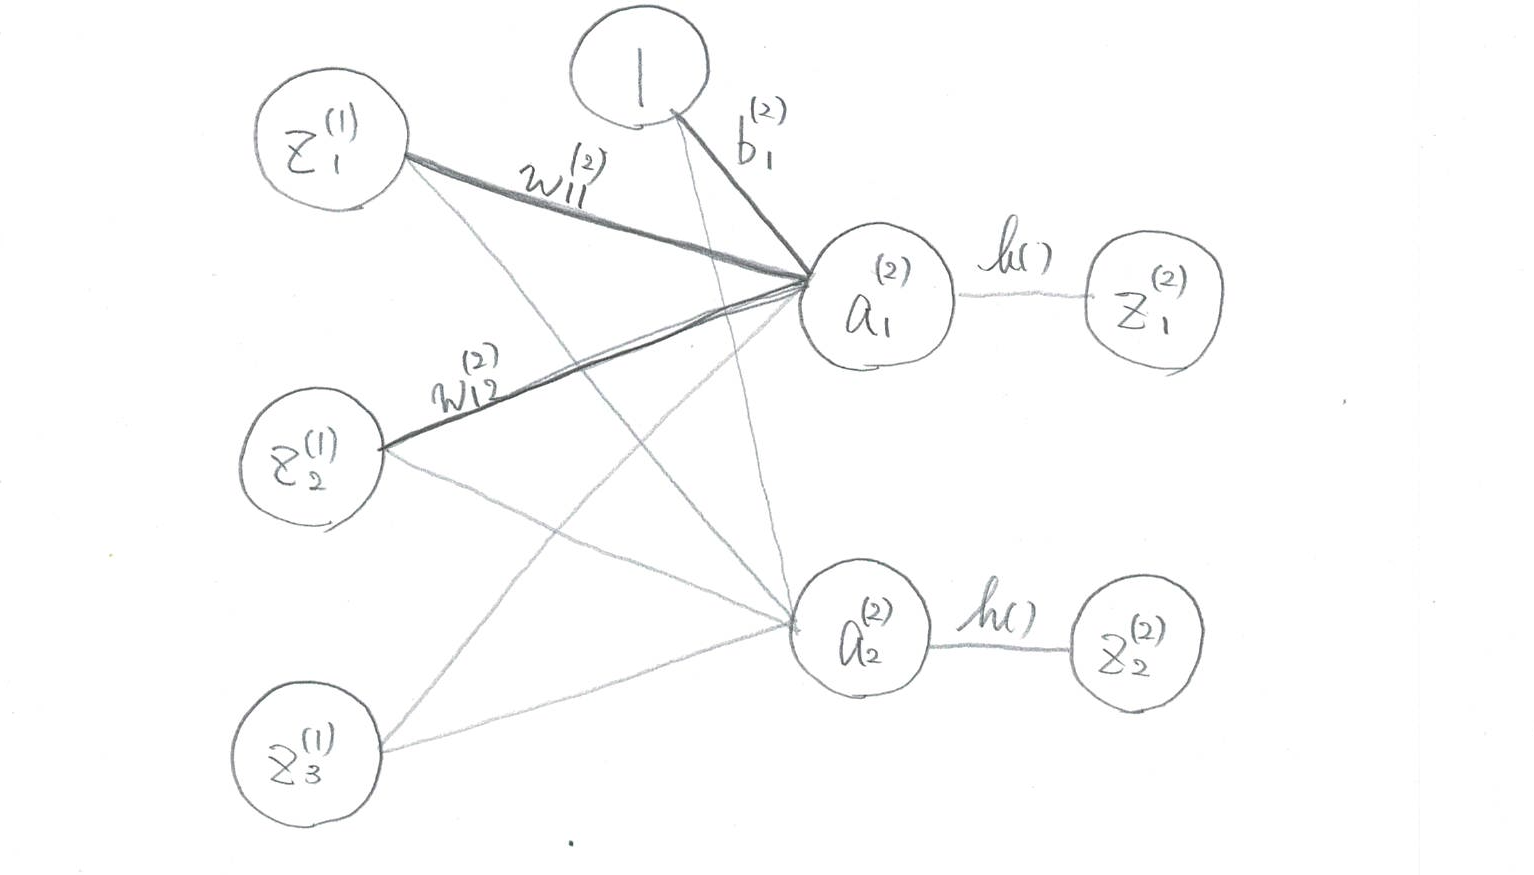

In [7]:
from IPython.display import Image
Image('２層目.png')

### ⇨基本的にはx1,x2がz1,z2,z3に変わっただけ
### ⇨とはいえ重みとバイアスの値は第２層ものに変わる

## コードの実装

In [8]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (1, 3)
print(W2.shape) # (3, 2)
print(B2.shape) # (1, 2)

# (1, 3) × (3, 2) = (1, 2)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print()
print('A2')
print(A2)
print()
print('Z2')
print(Z2)

(3,)
(3, 2)
(2,)

A2
[0.51615984 1.21402696]

Z2
[0.62624937 0.7710107 ]


# 3.4.2.2 第二層から出力層への信号の伝達 - (Ⅲ)

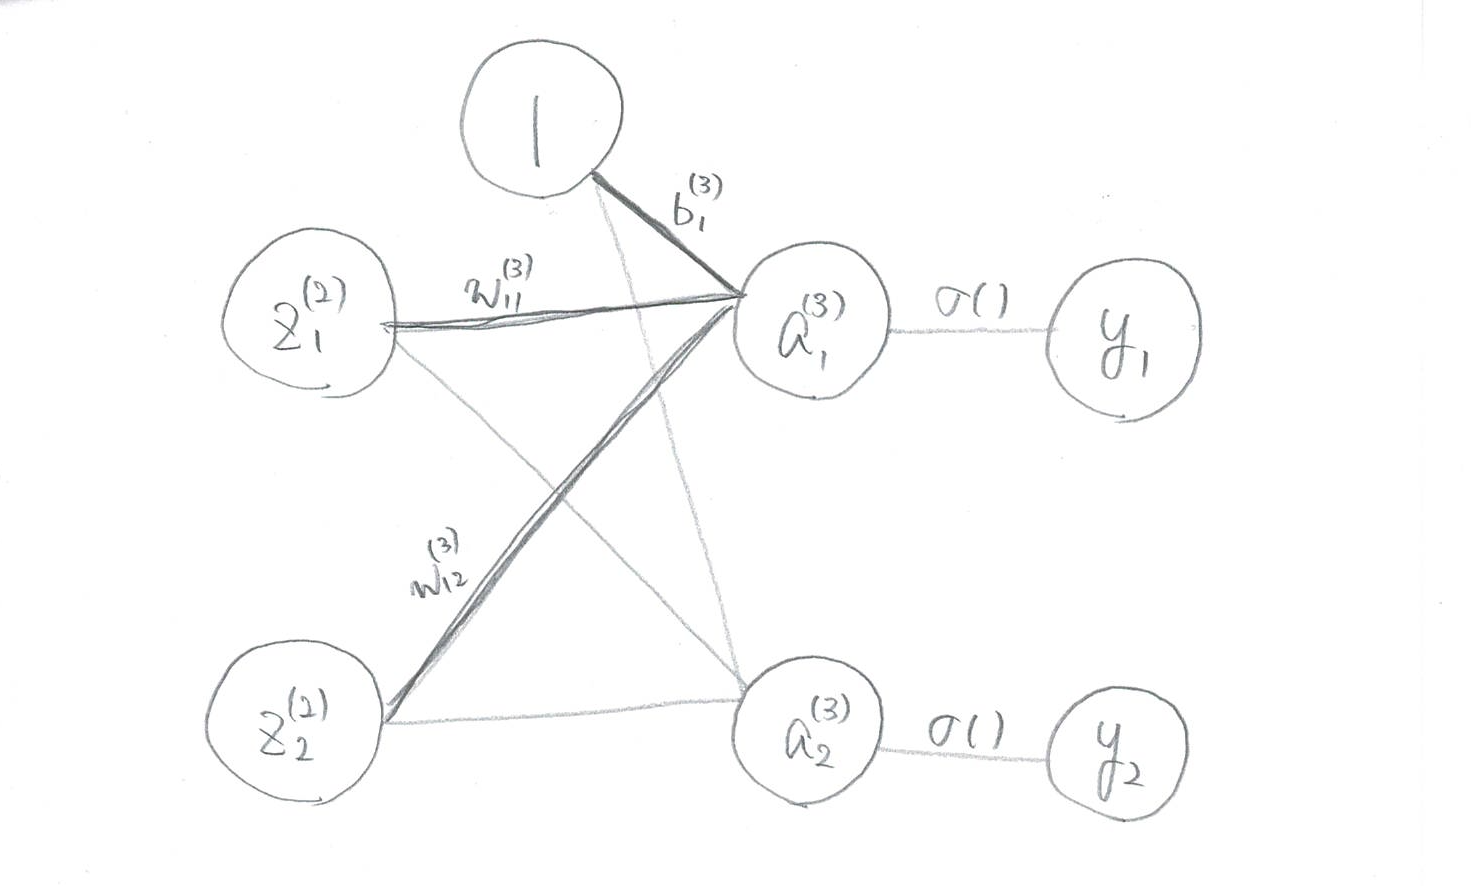

In [9]:
from IPython.display import Image
Image('３層目.png')

In [10]:
# 恒等関数の定義
def identity_function(x):
    return x

## $$f(x) = x$$

### こんなものなぜ定義するのか
### ⇨本書では流れを統一するため
### ⇨先を読んだからわかりますが恒等関数以外にも今後さまざまな関数を入れることになっていくので何かしらの関数が入ることを強調している気がする

In [11]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

print(Z2.shape) # (1, 2)
print(W3.shape) # (2, 2)
print(B3.shape) # (1, 2)

# (1, 2) × (2, 2) = (1, 2)

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print()
print('A3')
print(A3)
print()
print('Y')
print(Y)

(2,)
(2, 2)
(2,)

A3
[0.31682708 0.69627909]

Y
[0.31682708 0.69627909]


# 3.4.3 コードを読み解く

## 入力から出力までまとめて実装

In [12]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forword(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

In [13]:
network = init_network()
network['W1']

array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]])

In [14]:
x = np.array([1.0, 0.5])
y = forword(network, x)
print(y)

[0.31682708 0.69627909]


### ⇨関数forwordの命名については入力から出力に向かう処理だからということ
### ⇨伏線ですが学習フェーズではなにやら出力層から入力層へと逆方向に向かう処理があるとの記述

# 3.5 出力層の設計

### 特問題によって出力層の活性化関数は変更される

### ⇨回帰：恒等関数
### ⇨分類：ソフトマックス関数

# 3.5.1 恒等関数とソフトマックス関数 ⇨確率の定義を整理、確率かどうか

## なぜソフトマックス関数が分類問題で使われるのか

## $$y_k = \frac{e^{a_k}}{\sum_{i=1}^ne^{a_i}}$$

## $$y_k = \frac{e^{a_k}}{e^{a_1} + e^{a_2} + … + e^{a_n}}$$

### ここで日本語訳すると、、、
### 分数は「分母を１として考えると分子はどうか」と訳せる
### ここで分子は、akの値をeの指数とすることで数値の強調をしている
### ⇨eはだいたい2.71...というの数値なので

In [15]:
print(np.exp(2))
print(np.exp(5))

7.38905609893065
148.4131591025766


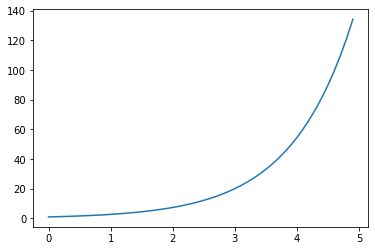

In [16]:
import matplotlib.pyplot as plt
x = np.arange(0, 5.0, 0.1)
y = np.exp(x)
plt.plot(x, y)
plt.show()

### 続いて分母は分子の値を含むその層の各ニューロンをeの指数とし、全て合計している。
### この分母を1とした時に分子はどうかと考えるので
### ykというのはその層において、全体の中でakが占める割合をeによって強調（差を大きく）して表す。

## コードの実装

In [17]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [18]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [19]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [20]:
# ネイピア数を使わない場合
y_ = a / np.sum(a)
print(y_)

[0.04166667 0.40277778 0.55555556]


In [21]:
# ソフトマックス関数を定義
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

## 3.5.2 ソフトマックス関数に実装上の注意

### 数値が大きくなりすぎ、計算量が膨大であることが問題

### ⇨式3.11は値をゼロ付近にすることができる

## $$ y_k = \frac{e^{a_k}}{\sum_{i=1}^ne^{a_i}} = \frac{e^{a_k + C'}}{\sum_{i=1}^ne^{a_i + C'}} $$

#### ちなみに

### $$ y_k = \frac{e^{a_k}}{\sum_{i=1}^ne^{a_i}} $$

### $$ = \frac{Ce^{a_k}}{C\sum_{i=1}^ne^{a_i}} $$

### $$ = \frac{Ce^{a_k}}{C(e^{a_1} + e^{a_2} + … + e^{a_n})} $$

$$ C = e^{logC} より$$

### $$ = \frac{e^{logC}e^{a_k}}{e^{logC}(e^{a_1} + e^{a_2} + … + e^{a_n})} $$

### $$ = \frac{e^{a_k + logC}}{\sum_{i=1}^ne^{a_i + logC}} $$

### $$ = \frac{e^{a_k + C'}}{\sum_{i=1}^ne^{a_i + C'}} $$

## コードの実装

In [22]:
a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [23]:
c = 4.0
print(a - c)

[-3.7 -1.1  0. ]


In [24]:
softmax(a - c)

array([0.01821127, 0.24519181, 0.73659691])

In [25]:
# オーバーフローを考慮しソフトマックス関数を再定義
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y